In [ ]:
import matplotlib.pyplot as py
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

In [ ]:
# Preparing the dataset
# Setup train and test splits

(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train_drawing = x_train
print("X_Train",x_train[0],"\n\n","y_train",y_train[0])

X_Train [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 25

In [ ]:
print("X_Train Shape:",x_train.shape,"\n\n","y_train Shape:",y_train.shape)

X_Train Shape: (60000, 28, 28) 

 y_train Shape: (60000,)


In [ ]:
image_size = 784 # since its 28 X 28
x_train = x_train.reshape(x_train.shape[0],image_size)
x_test = x_test.reshape(x_test.shape[0],image_size)

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
print(y_train.shape)
print(y_train[0]) # one-hot form

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


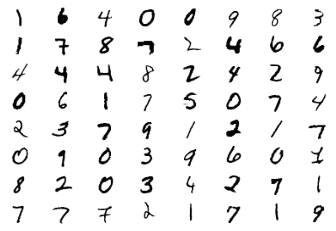

In [ ]:
for i in range(64) :

  ax = plt.subplot(8,8,i+1)
  ax.axis('off')
  plt.imshow(x_train_drawing[randint(0,x_train.shape[0])],cmap = 'Greys')

In [ ]:
model = Sequential() # feed forward - backward propagate
# eager execution enabled - session online

model.add(Dense(units = 100,activation = 'sigmoid',input_shape=(image_size,))) 
model.add(Dense(units=100,activation='sigmoid'))
model.add(Dense(units=num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="sgd",loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs = 100,verbose=True,validation_split = .1)

Epoch 1/100
422/422 [==============================] - 3s 6ms/step - loss: 2.1789 - accuracy: 0.3186 - val_loss: 1.7216 - val_accuracy: 0.6870
Epoch 2/100
422/422 [==============================] - 2s 5ms/step - loss: 1.6240 - accuracy: 0.6895 - val_loss: 1.2553 - val_accuracy: 0.8072
Epoch 3/100
422/422 [==============================] - 2s 5ms/step - loss: 1.2057 - accuracy: 0.7866 - val_loss: 0.9326 - val_accuracy: 0.8582
Epoch 4/100
422/422 [==============================] - 2s 4ms/step - loss: 0.9251 - accuracy: 0.8356 - val_loss: 0.7304 - val_accuracy: 0.8815
Epoch 5/100
422/422 [==============================] - 2s 4ms/step - loss: 0.7429 - accuracy: 0.8607 - val_loss: 0.5973 - val_accuracy: 0.8947
Epoch 6/100
422/422 [==============================] - 2s 4ms/step - loss: 0.6198 - accuracy: 0.8788 - val_loss: 0.5056 - val_accuracy: 0.9078
Epoch 7/100
422/422 [==============================] - 1s 4ms/step - loss: 0.5468 - accuracy: 0.8850 - val_loss: 0.4447 - val_accuracy: 0.9112

In [ ]:
lose,accuracy = model.evaluate(x_test,y_test,verbose = True)

313/313 [==============================] - 0s 1ms/step - loss: 0.1393 - accuracy: 0.9571


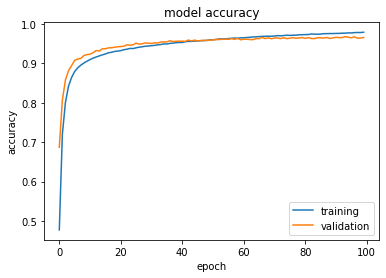

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()